# Importing  Essential Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Create a DataFrame with 10 columns and 20 rows
data = {
    'Area (sq ft)': np.random.randint(800, 3000, size=20),  # Random area between 800 and 3000 sq ft
    'Bedrooms': np.random.randint(1, 6, size=20),            # Random number of bedrooms (1 to 5)
    'Age of Home (years)': np.random.randint(0, 50, size=20),  # Age of the home in years
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=20),  # Location type
    'Garage (yes/no)': np.random.choice(['Yes', 'No'], size=20),  # Garage presence
    'Bathrooms': np.random.randint(1, 4, size=20),            # Random number of bathrooms
    'Garden (yes/no)': np.random.choice(['Yes', 'No'], size=20),  # Garden presence
    'School Rating': np.random.uniform(1, 10, size=20),       # School rating from 1 to 10
    'Nearby Park (yes/no)': np.random.choice(['Yes', 'No'], size=20),  # Park presence
    'Price ($)': np.random.randint(100000, 500000, size=20)   # Random price between $100,000 and $500,000
}

In [3]:
# Creating DataFrame 

df  = pd.DataFrame(data)
df.head()

Area (sq ft)  Bedrooms  Age of Home (years)  Location Garage (yes/no)  \
0          2760         2                   48     Urban             Yes   
1          1352         3                   17     Urban             Yes   
2           835         1                   22     Rural             Yes   
3           985         5                    2  Suburban              No   
4          1515         1                   24     Urban              No   

   Bathrooms Garden (yes/no)  School Rating Nearby Park (yes/no)  Price ($)  
0          3              No       3.731120                   No     149196  
1          3             Yes       2.456711                   No     258297  
2          3             Yes       9.795868                   No     199832  
3          1              No       6.381001                   No     268426  
4          1              No       7.126288                   No     124271

In [4]:
df.columns

Index(['Area (sq ft)', 'Bedrooms', 'Age of Home (years)', 'Location',
       'Garage (yes/no)', 'Bathrooms', 'Garden (yes/no)', 'School Rating',
       'Nearby Park (yes/no)', 'Price ($)'],
      dtype='object')

In [5]:
df.describe()

Area (sq ft)   Bedrooms  Age of Home (years)  Bathrooms  School Rating  \
count     20.000000  20.000000            20.000000  20.000000      20.000000   
mean    1775.550000   3.100000            27.500000   1.850000       5.594770   
std      655.147028   1.518309            14.798649   0.933302       2.801978   
min      835.000000   1.000000             2.000000   1.000000       1.153533   
25%     1321.250000   2.000000            17.000000   1.000000       2.762007   
50%     1755.000000   3.000000            27.000000   1.500000       6.123082   
75%     2231.750000   5.000000            42.250000   3.000000       7.362998   
max     2843.000000   5.000000            48.000000   3.000000       9.795868   

           Price ($)  
count      20.000000  
mean   280863.250000  
std    118252.004628  
min    124271.000000  
25%    188481.250000  
50%    267268.000000  
75%    364559.750000  
max    494802.000000

In [6]:
df.isnull().sum()

Area (sq ft)            0
Bedrooms                0
Age of Home (years)     0
Location                0
Garage (yes/no)         0
Bathrooms               0
Garden (yes/no)         0
School Rating           0
Nearby Park (yes/no)    0
Price ($)               0
dtype: int64

In [7]:
# Distribution of numeric features
numeric_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(numeric_features[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [8]:
# Categorical feature counts

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=[object]).columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
plt.tight_layout()
plt.show()

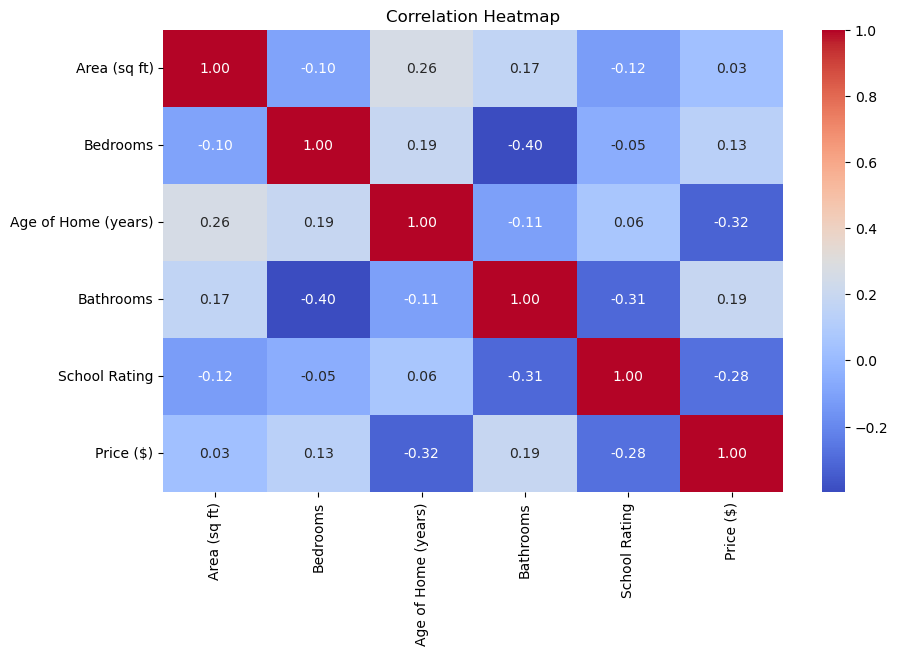

In [9]:
# Corelation heatmap

plt.figure(figsize=(10, 6))
correlation = numeric_features.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Pairplot

sns.pairplot(df, hue='Location', palette='Set1', diag_kind='kde')
plt.title('Pairplot of Housing Data')
plt.show()

In [11]:
# Preprocess the data
# Convert categorical variables to numerical

df['Location'] = df['Location'].map({'Urban': 1, 'Suburban': 2, 'Rural': 3})
df['Garage (yes/no)'] = df['Garage (yes/no)'].map({'Yes': 1, 'No': 0})
df['Garden (yes/no)'] = df['Garden (yes/no)'].map({'Yes': 1, 'No': 0})
df['Nearby Park (yes/no)'] = df['Nearby Park (yes/no)'].map({'Yes': 1, 'No': 0})


In [12]:
# Features and target variable
X = df.drop('Price ($)', axis=1)  # Features
y = df['Price ($)']                # Target variable

In [13]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create and train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
result = pd.DataFrame({
    'Predicted': y_pred,
    'Actual':y_test
})

In [17]:
result

Predicted  Actual
0    37475.840340  149196
17  -15016.485688  273321
15   99370.387010  423026
1   201934.767805  258297

In [18]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Model Evaluation:
Mean Squared Error: 50887389191.37501
R^2 Score: -4.354247211617365


# After scaling 

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred1 = model1.predict(X_test_scaled)

In [31]:
result = pd.DataFrame({
    'Predicted': y_pred1,
    'Actual':y_test
})


In [32]:
result

Predicted  Actual
0    37475.840340  149196
17  -15016.485688  273321
15   99370.387010  423026
1   201934.767805  258297

In [33]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Model Evaluation:
Mean Squared Error: 50887389191.37495
R^2 Score: -4.354247211617359


Hyper parameter tunning with ridge for better accuracy

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge = Ridge()

In [36]:
# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]} 

In [37]:
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')


In [38]:
# Fit the model
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [39]:
# Get the best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 10}


In [40]:
# Make predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [42]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error on test set: 12794381481.814722
R^2 Score: -0.3461936731662043
